In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 자전거 데이터 캐글
# https://www.kaggle.com/c/bike-sharing-demand/overview

# Data Fields
# datetime - hourly date + timestamp  
# season -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
# holiday - whether the day is considered a holiday
# workingday - whether the day is neither a weekend nor holiday
# weather - 1: Clear, Few clouds, Partly cloudy, Partly cloudy
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
# temp - temperature in Celsius
# atemp - "feels like" temperature in Celsius
# humidity - relative humidity
# windspeed - wind speed
# casual - number of non-registered user rentals initiated
# registered - number of registered user rentals initiated
# count - number of total rentals

In [51]:
# 데이터 불러오기
bike_df = pd.read_csv('data/bike_train.csv') #TODO:YOUR_CODE_HERE
bike_df.head(5)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [52]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [53]:
bike_df.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [54]:
# 문자열을 datetime 타입으로 변경.
bike_df['datetime'] = bike_df.datetime.apply(pd.to_datetime)

In [55]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.7 KB


In [56]:
# datetime 타입에서 년, 월, 일, 시간 추출
# 년 추출 #TODO:YOUR_CODE_HERE
bike_df['year'] = bike_df['datetime'].dt.year
# 월 추출 #TODO:YOUR_CODE_HERE
bike_df['month'] = bike_df['datetime'].dt.month

# 일 추출 #TODO:YOUR_CODE_HERE

bike_df['day'] = bike_df['datetime'].dt.day

# 시간 추출 #TODO:YOUR_CODE_HERE
bike_df['hour'] = bike_df['datetime'].dt.hour
# 요일 추출
bike_df['dayofweek'] = bike_df['datetime'].dt.dayofweek
days = ['월','화','수','목','금','토','일']
bike_df['dayofweek'].apply(lambda x: days[x])

bike_df.head(3)

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,1,1,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,1,1,2,5


In [57]:
drop_columns = ['datetime','casual','registered']
# 필요없는 컬럼 삭제하기

bike_df.drop(drop_columns, axis=1, inplace=True)

In [ ]:
# EDA를 위한 시각화하기
# 조건에 따른 대여량 시각화

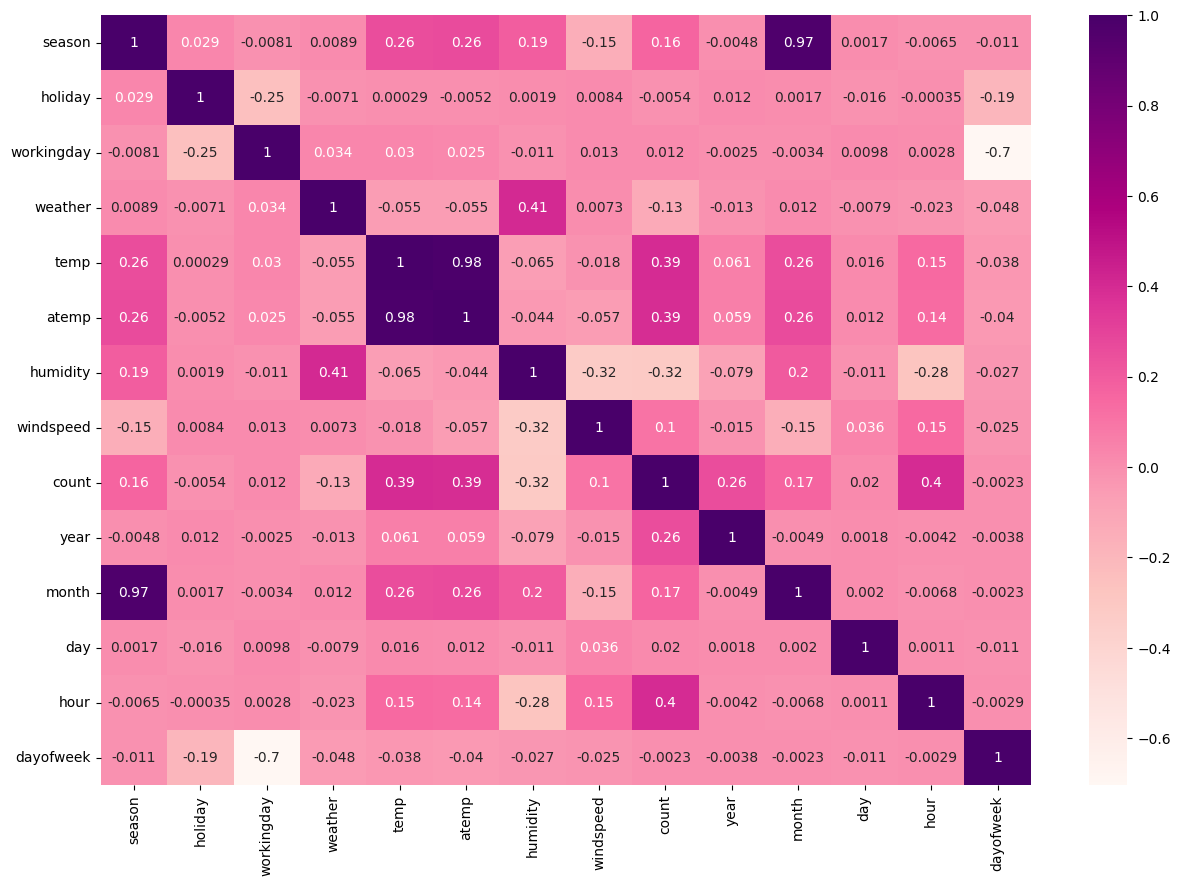

In [58]:
# TODO: 막대 그래프(년, 월, 시즌, 날씨, 일, 시간, 휴일, 근무일)
plt.figure(figsize=(15, 10))

corrMatrix = bike_df.corr()
sns.heatmap(corrMatrix, annot=True, cmap='RdPu')
plt.show()

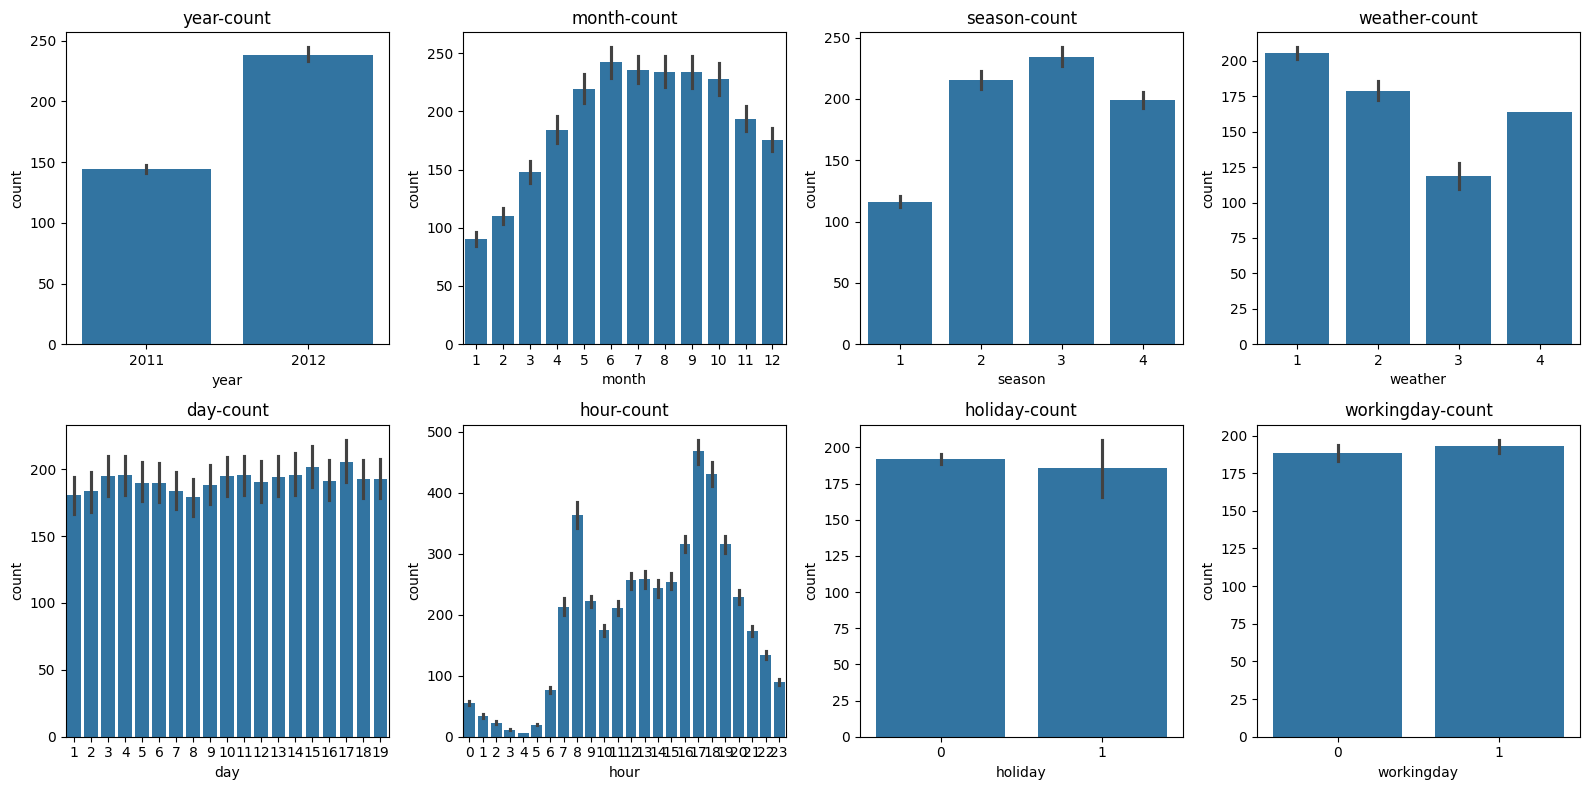

In [59]:
plt.figure(figsize=(16, 8))
features = ['year', 'month','season','weather','day', 'hour', 'holiday','workingday']
 
for i, feature in enumerate(features):
    plt.subplot(2, 4, i+1)
    sns.barplot(x=feature, y='count', data=bike_df)
    plt.title(feature+'-count')
 
plt.tight_layout()
 

In [60]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   count       10886 non-null  int64  
 9   year        10886 non-null  int32  
 10  month       10886 non-null  int32  
 11  day         10886 non-null  int32  
 12  hour        10886 non-null  int32  
 13  dayofweek   10886 non-null  int32  
dtypes: float64(3), int32(5), int64(6)
memory usage: 978.2 KB


In [ ]:
# 의미 도출 

In [61]:
# 변수선택
X = bike_df.drop(['count', 'temp','day'], axis=1)
y = bike_df['count']

In [62]:
X

,season,holiday,workingday,weather,atemp,humidity,windspeed,year,month,hour,dayofweek
0,1,0,0,1,14.395,81,0.0000,2011,1,0,5
1,1,0,0,1,13.635,80,0.0000,2011,1,1,5
2,1,0,0,1,13.635,80,0.0000,2011,1,2,5
3,1,0,0,1,14.395,75,0.0000,2011,1,3,5
4,1,0,0,1,14.395,75,0.0000,2011,1,4,5
...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,19.695,50,26.0027,2012,12,19,2
10882,4,0,1,1,17.425,57,15.0013,2012,12,20,2
10883,4,0,1,1,15.910,61,15.0013,2012,12,21,2
10884,4,0,1,1,17.425,61,6.0032,2012,12,22,2


In [63]:
y

0         16
1         40
2         32
3         13
4          1
        ... 
10881    336
10882    241
10883    168
10884    129
10885     88
Name: count, Length: 10886, dtype: int64

In [64]:
# 훈련세트/테스트세트 분할
from sklearn.model_selection import train_test_split

X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2,
                                                        random_state=10,)
print(X_train1.shape, X_test1.shape, y_train1.shape, y_test1.shape)



(8708, 11) (2178, 11) (8708,) (2178,)


In [65]:
# 모델 생성 및 훈련(선형모델)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(X_train1, y_train1)

pred = model.predict(X_test1)

print(f'MSE: {mean_squared_error(y_test1,pred):.2f}') 
print(f'r2_score: {r2_score(y_test1,pred):.2f}')

print(f'train: {model.score(X_train1,y_train1):.2f}') 
print(f'r2_score: {model.score(X_test1,y_test1):.2f}')

MSE: 20820.34
r2_score: 0.39
train: 0.39
r2_score: 0.39


In [66]:
# 모델 생성 및 훈련(KNN)

from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

KN_model = KNeighborsRegressor()
KN_model.fit(X_train1, y_train1)

KN_pred = KN_model.predict(X_test1)

print(f'MSE: {mean_squared_error(y_test1,KN_pred):.2f}') 
print(f'r2_score: {r2_score(y_test1,KN_pred):.2f}')

print(f'train: {KN_model.score(X_train1,y_train1):.2f}') 
print(f'r2_score: {KN_model.score(X_test1,y_test1):.2f}')


MSE: 14122.11
r2_score: 0.59
train: 0.74
r2_score: 0.59


In [67]:
# 모델 생성 및 훈련(random forest)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

RM_model = RandomForestRegressor()
RM_model.fit(X_train1, y_train1)

RM_pred = RM_model.predict(X_test1)

print(f'MSE: {mean_squared_error(y_test1,RM_pred):.2f}') 
print(f'r2_score: {r2_score(y_test1,RM_pred):.2f}')

print(f'train: {RM_model.score(X_train1,y_train1):.2f}') 
print(f'r2_score: {RM_model.score(X_test1,y_test1):.2f}')

MSE: 1606.18
r2_score: 0.95
train: 0.99
r2_score: 0.95


In [69]:
# 수치형변수 스케일링 
from sklearn.preprocessing import StandardScaler

numerical_features = ['atemp', 'humidity', 'windspeed']

scaler = StandardScaler() 

X_train1[numerical_features] = scaler.fit_transform(X_train1[numerical_features])  
X_test1[numerical_features] = scaler.transform(X_test1[numerical_features])

<Axes: >

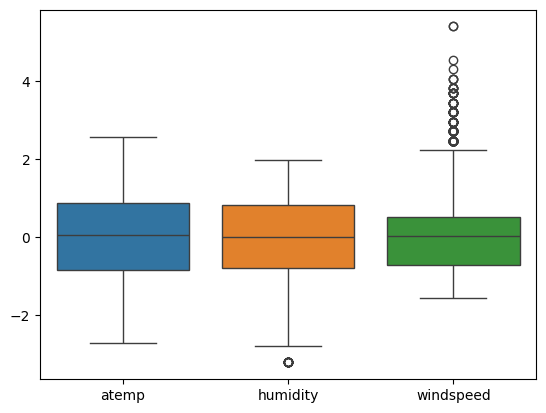

In [70]:
sns.boxplot(X_train1[numerical_features])

In [75]:
# 범주형변수 원핫인코딩 
from sklearn.preprocessing import OneHotEncoder

categorical_features = ['season', 'weather', 'year', 'month', 'hour', 'dayofweek']

ohe = OneHotEncoder(handle_unknown='ignore', sparse_output= False)

X_train1_ohe = ohe.fit_transform(X_train1[categorical_features])  
X_test1_ohe = ohe.transform(X_test1[categorical_features])

ohe_column = ohe.get_feature_names_out(categorical_features)

X_train1_ohe = pd.DataFrame(X_train1_ohe, columns=ohe_column,index=X_train1.index)
X_test1_ohe = pd.DataFrame(X_test1_ohe, columns=ohe_column,index=X_test1.index)


In [76]:
X_train_preprocessed = pd.concat([X_train1[numerical_features], X_train1_ohe], axis=1)
X_test_preprocessed = pd.concat([X_test1[numerical_features], X_test1_ohe], axis=1)


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model2 = LinearRegression()
model2.fit(X_train_preprocessed, y_train1)

pred2 = model2.predict(X_test_preprocessed)

print(f'MSE: {mean_squared_error(y_test1,pred2):.2f}') 
print(f'r2_score: {r2_score(y_test1,pred2):.2f}')

print(f'train: {model2.score(X_train_preprocessed,y_train1):.2f}') 
print(f'r2_score: {model2.score(X_test_preprocessed,y_test1):.2f}')

MSE: 10438.14
r2_score: 0.70
train: 0.69
r2_score: 0.70


In [ ]:
# 최종 훈련 테스트 데이터 만들어서 모델 생성 및 훈련

In [ ]:
# 새로운 데이터 예측 하기 

new_row = {
    "season": 2, "holiday": 0, "workingday": 1, "weather": 1,
    "atemp": 20.5, "humidity": 55, "windspeed": 0.12,
    "year": 2025, "month": 5, "day": 1, "hour": 17, "dayofweek": 3
}

new_df = pd.DataFrame([new_row])


print(f"예상 대여 수: {count_pred:.0f}대")